In [1]:
import numpy as np
import pandas as pd
import pickle
import os
from lib.read_data import dataset,Datasets,readDataWithRawScore
from math import copysign

from sklearn.pipeline import Pipeline

# feature extractors
from sklearn.decomposition import PCA
# classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
# finetuning
from sklearn.model_selection import GridSearchCV
# validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# plot
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
def draw_roc_curve(fpr,tpr,score):
    '''
    draw roc curve
    '''
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % score)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()
    
def run_display_output(classifier,test,DRAW=False):
    '''
    get confusion matrix and auc score for test dataset
    (optional) draw roc curve
    '''
    pred = classifier.predict(test[0])
    tn, fp, fn, tp = confusion_matrix(test[1],pred).ravel()#confusion matrix
    print(tn,fp,fn,tp)
    sensitivity = tp/(fn+tp)
    specificity = tn/(fp+tn)
    prods = classifier.predict_proba(test[0])[:,1]
    fpr, tpr, _ = metrics.roc_curve(test[1], prods)
    score = metrics.auc(fpr,tpr) #auc score
    if DRAW:
        draw_roc_curve(fpr,tpr,score)

    return sensitivity, specificity, score

def display_res_gavin_and_best_model(param_grid,pipeline,mvid,filename=None,DRAW=False):
    '''
    use model defined by pipeline to fit mvid Dataset
    gridsearchCV determine the parameters given in param_grid
    (optional) save the model in path given in filename
    '''
    classifier = GridSearchCV(estimator=pipeline,
                              param_grid=param_grid)

    print('Start training...')
    classifier.fit(mvid[0],mvid[1])
    print('Model Description:\n',classifier.best_estimator_)
    if filename:
        pickle.dump(classifier,open(filename,'wb'))
        print('Saved model to path:',filename)
    sensitivity,specificity,score = run_display_output(classifier,[mvid[2],mvid[3]],DRAW=DRAW)
    print('>>> best model results: sensitivity: {:.{prec}}\tspecificity: {:.{prec}f}\tauc:{}'.\
    format(sensitivity,specificity,score,prec=3))
    return classifier

In [3]:
if __name__=='__main__':
    
    def load_bonderWestraData(path):
        data = pd.read_csv(path,sep=',',index_col=0)
        def binarize(row):
            if row > 0:
                return 1
            else:
                return 0
        data['direction'] = data['zscore'].apply(binarize)
        print('Raw data loaded.')
        dataset = readDataWithRawScore(data,'direction')
        return dataset
    
    etCpG_path = 'data/etCpG_withzscore.csv'
    gtCpG_path = 'data/gtCpG_withzscore.csv'
    
    bonder_path = 'data/Newbonder_withzscore.csv'
    westra_allFeat_path = 'data/Newwestra_all_with_zscore.csv'
    westra_bonderFeat_path = 'data/Newwestra_bonderfeat_with_zscore.csv'

    etCpG = load_bonderWestraData(etCpG_path)
    gtCpG = load_bonderWestraData(gtCpG_path)
    
    bonder = load_bonderWestraData(bonder_path)
    westra_allFeat = load_bonderWestraData(westra_allFeat_path)
    westra_bonderFeat = load_bonderWestraData(westra_bonderFeat_path)

    print('etCpG dataset loaded.',etCpG.train.values.shape)
    print('gtCpG dataset loaded.',gtCpG.train.values.shape)
    print('bonder dataset loaded.',bonder.train.values.shape)
    print('westra with all features dataset loaded.',westra_allFeat.train.values.shape)
    print('westra with bonder features dataset loaded.',westra_bonderFeat.train.values.shape)

Raw data loaded.
Data Normalized.
Raw data loaded.
Data Normalized.
Raw data loaded.
Data Normalized.
Raw data loaded.
Data Normalized.
Raw data loaded.
Data Normalized.
etCpG dataset loaded. (5622, 34)
gtCpG dataset loaded. (21340, 34)
bonder dataset loaded. (2131, 9)
westra with all features dataset loaded. (2644, 35)
westra with bonder features dataset loaded. (2644, 9)


In [25]:
TSS_et_path = os.path.join('data','TSS_distances_et0.csv')
TSS_gt_path = os.path.join('data','TSS_distances_gt0.csv')
colnames = ['cpgName','TSSdistances']
tss_et = pd.read_csv(TSS_et_path,sep=',').rename(index=str,columns={'Unnamed: 0':'cpgName','0':'TSSdistances'})
tss_gt = pd.read_csv(TSS_gt_path,sep=',').rename(index=str,columns={'Unnamed: 0':'cpgName','0':'TSSdistances'})

tss_et_dic = tss_et.set_index(['cpgName']).to_dict()
def addTSSdistances(row):
    try:
        return tss_et_dic[row]
    except:
        return None
etCpG_path = 'data/etCpG_withzscore.csv'
datatable = pd.read_csv(etCpG_path,sep=',')
# datatable['cpgName']
datatable['TSSdistances'] = datatable['cpgName'].apply(addTSSdistances)
datatble.TSSdistances

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
7467    None
7468    None
7469    None
7470    None
7471    None
7472    None
7473    None
7474    None
7475    None
7476    None
7477    None
7478    None
7479    None
7480    None
7481    None
7482    None
7483    None
7484    None
7485    None
7486    None
7487    None
7488    None
7489    None
7490    None
7491    None
7492    None
7493    None
7494    None
7495    None
7496    None
Name: TSSdistances, Length: 7497, dtype: object

In [6]:
def tryTwoQuickModels(eqtm_data,DRAW=False):
    # get the error cases and the correct cases
    feature_list = [col for col in eqtm_data.train.values.columns
                    if col not in ['zscore','cpgName','']]
    train_data = eqtm_data.train.values[feature_list]
    test_data = eqtm_data.test.values[feature_list]
    
    # ============random forest================
    pipeline_ranfor = Pipeline(steps=[('ranfor',
                                       RandomForestClassifier())])
    n_estimators = [10,50,100]
    class_weight = ['balanced',{1:4,0:1},{1:2,0:1}]
    param_grid_ranfor = [{'ranfor__n_estimators':n_estimators,
                        'ranfor__class_weight':class_weight}]
    classifier_ranfor = display_res_gavin_and_best_model(
                        param_grid_ranfor,
                        pipeline_ranfor,
                        [train_data,
                         eqtm_data.train.labels,
                         test_data,
                         eqtm_data.test.labels],
                         DRAW=DRAW)
    # ==========================================
    
    # ===========knn============================
    pipeline_kneighbor = Pipeline(steps=[('kneighbor',
                                          KNeighborsClassifier())])
    # print(pipeline_kneighbor.get_params().keys())
    n_neighbors = range(2,10)
    weights = ['uniform','distance']
    # algorithms = ['auto']
    # leaf_size = [20,30,40,50]
    # p = [1,2,3]
    param_grid_kneighbor = [{'kneighbor__n_neighbors':n_neighbors,
                            'kneighbor__weights':weights}]#,
                            # 'kneighbor__algorithms':algorithms}]#,
                            # 'kneighbor__leaf_size':leaf_size,
                            # 'kneighbor__p':p}]
    classifier_kneighbor = display_res_gavin_and_best_model(
                            param_grid_kneighbor,
                            pipeline_kneighbor,
                            [train_data,
                         eqtm_data.train.labels,
                         test_data,
                         eqtm_data.test.labels],
                         DRAW=DRAW)
    # ==========================================
    
    
#     model = LogisticRegression()
#     model.fit(train_data,eqtm_data.train.labels)
    pred = classifier_kneighbor.predict(test_data)
    return pred,classifier_ranfor,classifier_kneighbor

Start training...
Model Description:
 Pipeline(memory=None,
     steps=[('ranfor', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])
3560 929 1222 1403


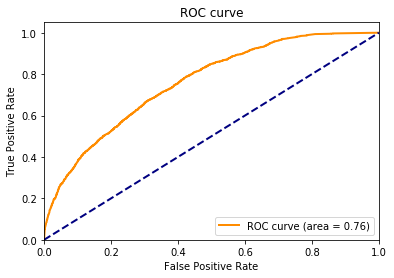

>>> best model results: sensitivity: 0.534	specificity: 0.793	auc:0.759345150579724
Start training...
Model Description:
 Pipeline(memory=None,
     steps=[('kneighbor', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='distance'))])
3511 978 1201 1424


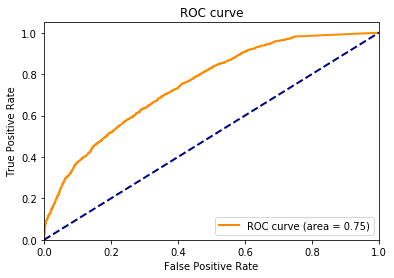

>>> best model results: sensitivity: 0.542	specificity: 0.782	auc:0.7501106408257221


In [7]:
# insignificant cpg sites
pred2,ranfor2,kneighbor2 = tryTwoQuickModels(eqtm_data=gtCpG,DRAW=True)

Start training...
Model Description:
 Pipeline(memory=None,
     steps=[('ranfor', RandomForestClassifier(bootstrap=True, class_weight={1: 2, 0: 1},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])
1373 86 153 263


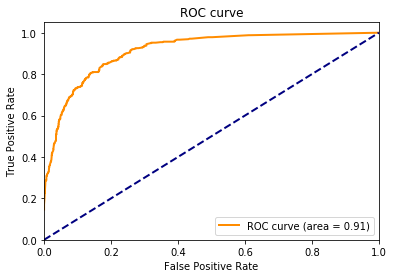

>>> best model results: sensitivity: 0.632	specificity: 0.941	auc:0.9138660238835872
Start training...
Model Description:
 Pipeline(memory=None,
     steps=[('kneighbor', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='distance'))])
1358 101 144 272


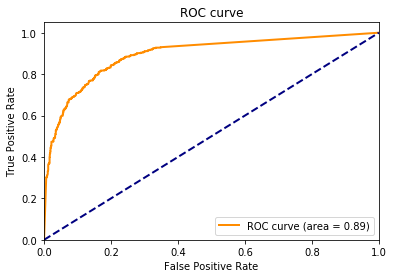

>>> best model results: sensitivity: 0.654	specificity: 0.931	auc:0.8938336980017928


In [8]:
# significant cpg sites
pred1,ranfor1,kneighbor1 = tryTwoQuickModels(etCpG,DRAW=True)

In [16]:
ranfor1.best_estimator_.steps[0][1].feature_importances_

array([0.03087894, 0.05595533, 0.03024038, 0.03191969, 0.02900305,
       0.04257939, 0.03317347, 0.02728278, 0.02139927, 0.03505902,
       0.02908328, 0.03242025, 0.02308338, 0.02633461, 0.03521247,
       0.03392156, 0.02042051, 0.0263823 , 0.03859149, 0.02939774,
       0.03246673, 0.02961903, 0.03319985, 0.02569909, 0.02769037,
       0.04431786, 0.01420674, 0.02385449, 0.03973757, 0.03122075,
       0.02277296, 0.04287566])

In [17]:
ranfor2.best_estimator_.steps[0][1].feature_importances_

array([0.03724524, 0.03633823, 0.03288275, 0.03648667, 0.02586149,
       0.0364783 , 0.03210832, 0.03274731, 0.02785152, 0.03428686,
       0.03071978, 0.02960729, 0.02582398, 0.02671152, 0.03297843,
       0.03191408, 0.0250767 , 0.02641252, 0.0377409 , 0.02732548,
       0.02816647, 0.02917344, 0.03324759, 0.03029437, 0.03288892,
       0.0383036 , 0.01393237, 0.02626479, 0.03570979, 0.03392212,
       0.02937012, 0.04212905])

In [36]:
etCpG_allFeat = etCpG.train.values.columns[1:-1]
etCpG_allFeat_sorted = etCpG_allFeat[np.argsort(ranfor1.best_estimator_.steps[0][1].feature_importances_)]
print(etCpG_allFeat_sorted)

Index(['H3K9me1_ImputedGapped_Roadmap_all_celltypes_westra_final_unique_',
       'H3K23ac_ImputedGapped_Roadmap_all_celltypes_westra_final_unique_',
       'H4K91ac_ImputedGapped_Roadmap_all_celltypes_westra_final_unique_',
       'H2AK9ac_ImputedGapped_Roadmap_all_celltypes_westra_final_unique_',
       'H3K4ac_ImputedGapped_Roadmap_all_celltypes_westra_final_unique_',
       'H3K14ac_ImputedGapped_Roadmap_all_celltypes_westra_final_unique_',
       'H2AK5ac_ImputedGapped_Roadmap_all_celltypes_westra_final_unique_',
       'H2BK120ac_ImputedGapped_Roadmap_all_celltypes_westra_final_unique_',
       'H2BK15ac_ImputedGapped_Roadmap_all_celltypes_westra_final_unique_',
       'H3K4me2_ImputedGapped_Roadmap_all_celltypes_westra_final_unique_',
       'H2BK12ac_ImputedGapped_Roadmap_all_celltypes_westra_final_unique_',
       'H3K36me3_ImputedGapped_Roadmap_all_celltypes_westra_final_unique_',
       'H3K9ac_ImputedGapped_Roadmap_all_celltypes_westra_final_unique_',
       'H3K79me2_Imput

Start training...
Model Description:
 Pipeline(memory=None,
     steps=[('ranfor', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])
276 71 124 240


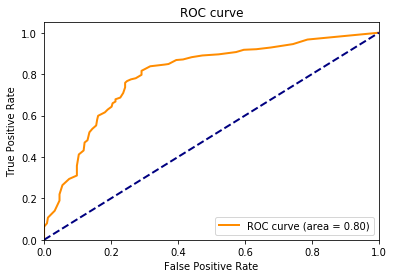

>>> best model results: sensitivity: 0.659	specificity: 0.795	auc:0.7967310067454161
Start training...
Model Description:
 Pipeline(memory=None,
     steps=[('kneighbor', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='distance'))])
265 82 89 275


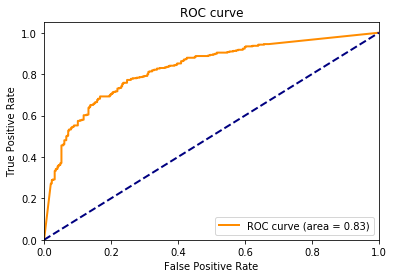

>>> best model results: sensitivity: 0.755	specificity: 0.764	auc:0.82632533172879


In [22]:
# bonder
pred_bonder,ranfor_bonder,kneighbor_bonder = tryTwoQuickModels(bonder,DRAW=True)

In [23]:
ranfor_bonder.best_estimator_.steps[0][1].feature_importances_

array([0.19865094, 0.03801289, 0.14826535, 0.07681438, 0.09376676,
       0.11634271, 0.32814697])

Start training...
Model Description:
 Pipeline(memory=None,
     steps=[('ranfor', RandomForestClassifier(bootstrap=True, class_weight={1: 2, 0: 1},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])
412 39 116 315


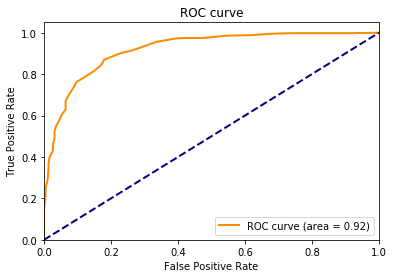

>>> best model results: sensitivity: 0.731	specificity: 0.914	auc:0.9194494317860283
Start training...
Model Description:
 Pipeline(memory=None,
     steps=[('kneighbor', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance'))])
381 70 93 338


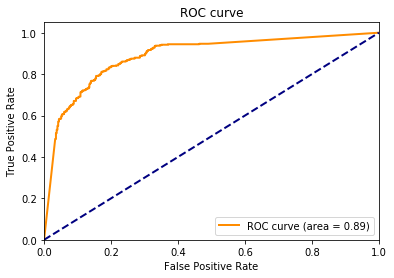

>>> best model results: sensitivity: 0.784	specificity: 0.845	auc:0.8873758237687839


array([0.02551524, 0.08010618, 0.03308709, 0.03332518, 0.02907633,
       0.03051709, 0.02579064, 0.02714579, 0.021494  , 0.02352622,
       0.02170594, 0.02367124, 0.02472536, 0.03274481, 0.03866861,
       0.02580709, 0.02190719, 0.01766956, 0.02900774, 0.02115682,
       0.03365727, 0.03123768, 0.0271065 , 0.02795075, 0.02987204,
       0.03759298, 0.0089958 , 0.02070783, 0.03102278, 0.02375033,
       0.02659227, 0.03584878, 0.07901689])

In [25]:
# westra_allfeat
pred_westra_all,ranfor_westra_all,kneighbor_westra_all = tryTwoQuickModels(westra_allFeat,DRAW=True)
westra_allFeat_importances = ranfor_westra_all.best_estimator_.steps[0][1].feature_importances_

In [32]:
westra_allFeat_importances = ranfor_westra_all.best_estimator_.steps[0][1].feature_importances_
westra_allFeat_importances[np.argsort(westra_allFeat_importances)]

array([0.0089958 , 0.01766956, 0.02070783, 0.02115682, 0.021494  ,
       0.02170594, 0.02190719, 0.02352622, 0.02367124, 0.02375033,
       0.02472536, 0.02551524, 0.02579064, 0.02580709, 0.02659227,
       0.0271065 , 0.02714579, 0.02795075, 0.02900774, 0.02907633,
       0.02987204, 0.03051709, 0.03102278, 0.03123768, 0.03274481,
       0.03308709, 0.03332518, 0.03365727, 0.03584878, 0.03759298,
       0.03866861, 0.07901689, 0.08010618])

In [35]:
westra_allFeat_training = westra_allFeat.train.values.columns[1:-1]
westra_allFeat_training_sorted = westra_allFeat_training[np.argsort(westra_allFeat_importances)]
print(westra_allFeat_training_sorted)

Index(['H3K9me1_ImputedGapped_all_celltypes_westra_final_unique_',
       'H2BK15ac_ImputedGapped_all_celltypes_westra_final_unique_',
       'H3K14ac_ImputedGapped_all_celltypes_westra_final_unique_',
       'H3K79me2_ImputedGapped_all_celltypes_westra_final_unique_',
       'H4K91ac_ImputedGapped_all_celltypes_westra_final_unique_',
       'H3K9ac_ImputedGapped_all_celltypes_westra_final_unique_',
       'H3K23ac_ImputedGapped_all_celltypes_westra_final_unique_',
       'DNase_ImputedGapped_all_celltypes_westra_final_unique_',
       'H4K8ac_ImputedGapped_all_celltypes_westra_final_unique_',
       'H2BK20ac_ImputedGapped_all_celltypes_westra_final_unique_',
       'H3K4ac_ImputedGapped_all_celltypes_westra_final_unique_',
       'H3K9me3_ImputedGapped_all_celltypes_westra_final_unique_',
       'H3K27ac_ImputedGapped_all_celltypes_westra_final_unique_',
       'H3K79me1_ImputedGapped_all_celltypes_westra_final_unique_',
       'H2AK9ac_ImputedGapped_all_celltypes_westra_final_unique

Start training...
Model Description:
 Pipeline(memory=None,
     steps=[('ranfor', RandomForestClassifier(bootstrap=True, class_weight={1: 2, 0: 1},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])
280 155 61 386


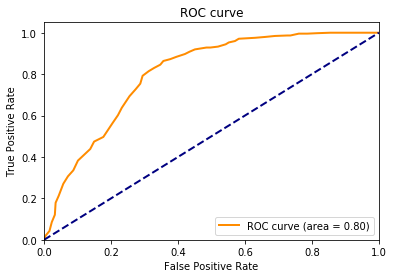

>>> best model results: sensitivity: 0.864	specificity: 0.644	auc:0.8028311347681863
Start training...
Model Description:
 Pipeline(memory=None,
     steps=[('kneighbor', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='distance'))])
312 123 68 379


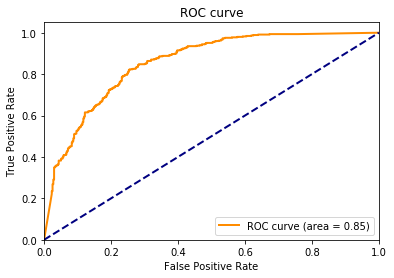

>>> best model results: sensitivity: 0.848	specificity: 0.717	auc:0.8541412738820747


array([0.17070013, 0.0450142 , 0.16086676, 0.08048443, 0.10747821,
       0.12100807, 0.31444821])

In [26]:
# westra_allfeat
pred_westra_bonderFeat,ranfor_westra_bonderFeat,kneighbor_westra_bonderFeat = tryTwoQuickModels(westra_bonderFeat,DRAW=True)
ranfor_westra_bonderFeat.best_estimator_.steps[0][1].feature_importances_